In [1]:
import blimpy
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
#url = "../../../mnt_blpd9/datax/dl/GBT_58008_70035_HIP77257_fine.h5"
url = "../../../mnt_blpd7/datax/dl/GBT_57436_51432_HIP77257_fine.h5"

In [16]:
start = 1530
stop = 1535
wf = blimpy.Waterfall(url, load_data=True, f_start=start, f_stop=stop)

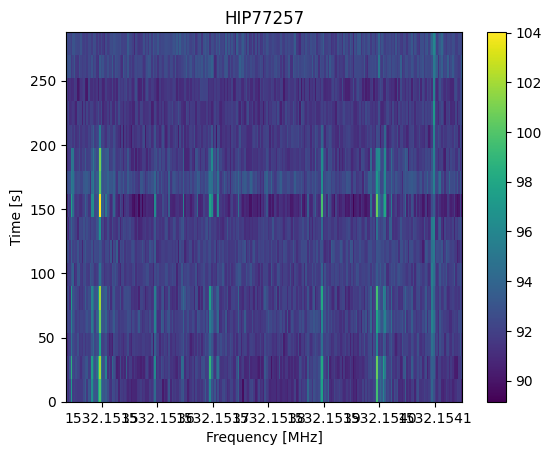

In [4]:
start = 1530 + 256 * 2.79e-6 * 3015
stop = start + 256 * 2.79e-6
wf.plot_waterfall(f_start=start, f_stop=stop)

In [5]:
#import stuff
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from skimage.transform import rescale, resize

2022-12-01 20:17:12.662788: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 20:17:12.781390: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-01 20:17:12.781458: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-01 20:17:12.837260: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-01 20:17:13.799881: W tensorflow/stream_executor/platform/de

In [6]:
# preprocess input
def preprocess_input(data):
    log_input = np.log(data)
    scale_input = (log_input - log_input.min()) / log_input.max()
    return scale_input


In [7]:
def extract_features(input_arr, model):
    input_shape = (224, 224, 3)
    preprocessed_arr = preprocess_input(input_arr)
    features = model.predict(preprocessed_arr, verbose = 0)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [8]:
# reference: https://www.oreilly.com/library/view/practical-deep-learning/9781492034858/ch04.html
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

2022-12-01 20:17:15.439350: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-01 20:17:15.439716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-01 20:17:15.439926: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-01 20:17:15.440106: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2022-12-01 20:17:15.440278: W tensorflow/stream_executor/platform/default/dso_loader.cc:64

In [9]:
# input data
start = 1530
stop = 1535
interval = 256 * 2.79e-6
step = interval
data_list = []
wf = blimpy.Waterfall(url, load_data=True, f_start=start, f_stop=stop)
for i in np.arange(start, stop, step):
    fstart, fstop = round(i, 3), i + interval
    _, sub_data = wf.grab_data(f_start=fstart, f_stop=fstop)
    resized_data = resize(sub_data, (1, 224, 224, 3))
    data_list.append(resized_data)
len(data_list)


7001

In [10]:
data_1st = data_list[0]
data_1st.shape

(1, 224, 224, 3)

In [11]:
np.array(data_list).shape

(7001, 1, 224, 224, 3)

In [12]:
feature_list = []
for i in range(len(data_list)):
    data = data_list[i]
    feature_list.append(extract_features(data, model))

In [13]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list)

In [14]:
distances, indices = neighbors.kneighbors([feature_list[3015]])

In [17]:
indices

array([[3015, 3014, 5538, 3348, 3981]])

In [23]:
distances

array([[1.4901161e-08, 2.3279290e-03, 2.4011105e-03, 2.4558736e-03,
        2.5278414e-03]], dtype=float32)

In [24]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine').fit(feature_list)

In [25]:
indices

array([[3015, 3014, 5538, 3348, 3981]])

In [26]:
distances

array([[1.4901161e-08, 2.3279290e-03, 2.4011105e-03, 2.4558736e-03,
        2.5278414e-03]], dtype=float32)

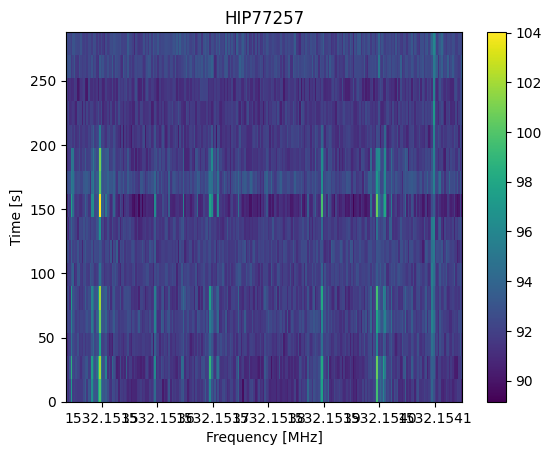

In [18]:
start = 1530 + 256 * 2.79e-6 * 3015
stop = start + 256 * 2.79e-6
wf.plot_waterfall(f_start=start, f_stop=stop)

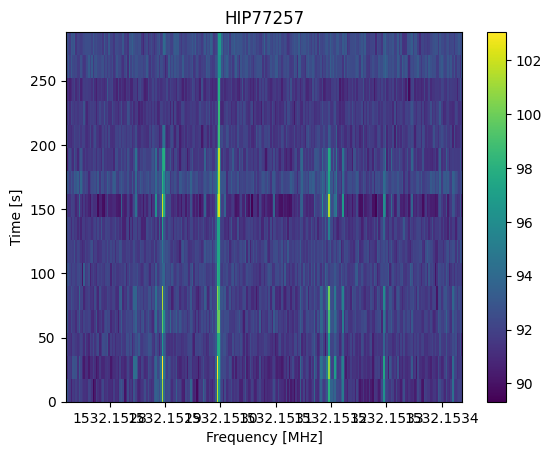

In [19]:
start = 1530 + 256 * 2.79e-6 * 3014
stop = start + 256 * 2.79e-6
wf.plot_waterfall(f_start=start, f_stop=stop)

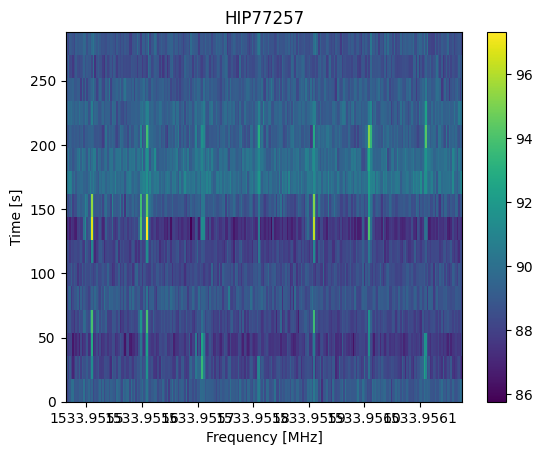

In [20]:
start = 1530 + 256 * 2.79e-6 * 5538
stop = start + 256 * 2.79e-6
wf.plot_waterfall(f_start=start, f_stop=stop)

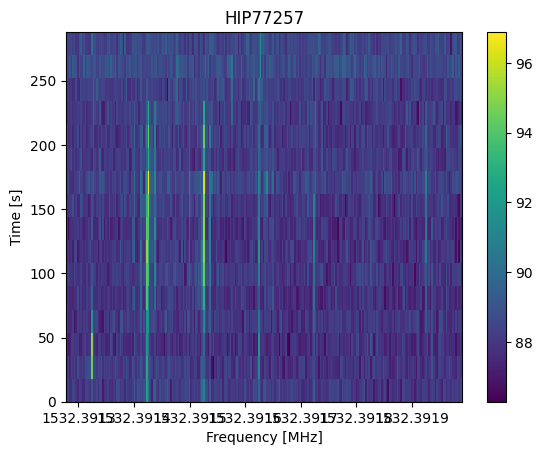

In [21]:
start = 1530 + 256 * 2.79e-6 * 3348
stop = start + 256 * 2.79e-6
wf.plot_waterfall(f_start=start, f_stop=stop)

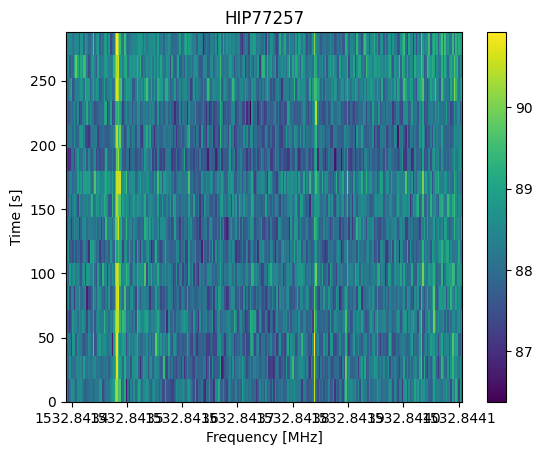

In [22]:
start = 1530 + 256 * 2.79e-6 * 3981
stop = start + 256 * 2.79e-6
wf.plot_waterfall(f_start=start, f_stop=stop)